<a href="https://colab.research.google.com/github/DavidGerardo2/Actividades/blob/main/Actividades/AF5_Procesamiento_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# AF5: Procesamiento de conjuntos de datos en Python
# Datos del equipo:
# - David Gerardo Guipzot Sanchez - 2173741 - Martes N4,N5,N6
# -
# - Diego Armando Bustos Montantes - 2063883 - Martes N4,N5,N6
# Fecha: 5 de septiembre del 2025


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [11]:
# Dataset (robot_sensors.csv) con datos ficticios de sensores de un robot
url = 'https://raw.githubusercontent.com/dilp90/InteligenciaArtificial_y_RedesNeuronales_UANL_FIME/main/MachineLearning/Datasets/robot_sensors.csv'
df = pd.read_csv(url)

# Ver primeras filas
df.head(51)


,Tiempo (s),Distancia (cm),Velocidad (cm/s),Temperatura (°C)
0,0,43.708611,9.256646,23.925585
1,1,95.564288,27.095047,23.704682
2,2,75.879455,43.647292,33.593819
3,3,63.879264,36.611244,23.743193
4,4,24.041678,40.328057,24.079246
5,5,24.039507,32.939168,31.390974
6,6,15.227525,34.613828,26.746098
7,7,87.955853,42.459783,31.650658
8,8,64.100351,12.483400,20.980492
9,9,73.726532,24.471248,27.313568


In [12]:
# Eliminar filas con valores vacíos
df_clean = df.dropna()

# Eliminar velocidades negativas
df_clean = df_clean[df_clean['Velocidad (cm/s)'] >= 0]

# Eliminar distancias o temperaturas negativas en caso de haberlo
df_clean = df_clean[df_clean['Distancia (cm)'] >= 0]
df_clean = df_clean[df_clean['Temperatura (°C)'] >= 0]

# Mostar los datos ya limpios
df_clean.head(51)


,Tiempo (s),Distancia (cm),Velocidad (cm/s),Temperatura (°C)
0,0,43.708611,9.256646,23.925585
1,1,95.564288,27.095047,23.704682
2,2,75.879455,43.647292,33.593819
3,3,63.879264,36.611244,23.743193
4,4,24.041678,40.328057,24.079246
5,5,24.039507,32.939168,31.390974
6,6,15.227525,34.613828,26.746098
7,7,87.955853,42.459783,31.650658
8,8,64.100351,12.483400,20.980492
9,9,73.726532,24.471248,27.313568


In [13]:
# Normalizador
scaler = MinMaxScaler()

# Columnas a normalizar
cols = ['Tiempo (s)', 'Distancia (cm)', 'Velocidad (cm/s)', 'Temperatura (°C)']

# Copiar y aplicar normalización
df_normalized = df_clean.copy()
df_normalized[cols] = scaler.fit_transform(df_clean[cols])

# Mostrar resultado
df_normalized.head(51)


,Tiempo (s),Distancia (cm),Velocidad (cm/s),Temperatura (°C)
0,0.000000,0.371735,0.182609,0.262269
1,0.001001,0.950755,0.540740,0.247509
2,0.002002,0.730954,0.873049,0.908233
3,0.003003,0.596960,0.731791,0.250082
4,0.004004,0.152134,0.806411,0.272535
5,0.005005,0.152110,0.658069,0.761054
6,0.006006,0.053716,0.691690,0.450716
7,0.007007,0.865799,0.849208,0.778404
8,0.008008,0.599429,0.247391,0.065498
9,0.009009,0.706915,0.488064,0.488630


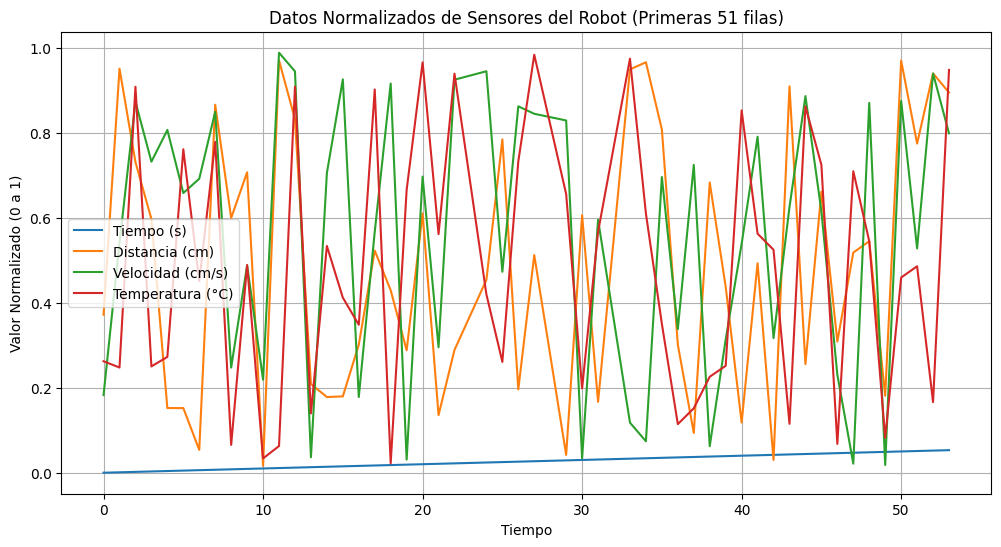

In [16]:
# Gráfica de las primeras 51 filas de las variables normalizadas
plt.figure(figsize=(12, 6))

for col in cols:
    plt.plot(df_normalized[col][:51], label=col)  # Solo los primeros 51 datos

plt.title("Datos Normalizados de Sensores del Robot (Primeras 51 filas)")
plt.xlabel("Tiempo")
plt.ylabel("Valor Normalizado (0 a 1)")
plt.legend()
plt.grid(True)
plt.show()

